In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.ticker import PercentFormatter
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
# Accès à la doc
# https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv')
df

GameID  LeagueIndex Age HoursPerWeek TotalHours       APM  \
0         52            5  27           10       3000  143.7180   
1         55            5  23           10       5000  129.2322   
2         56            4  30           10        200   69.9612   
3         57            3  19           20        400  107.6016   
4         58            3  32           10        500  122.8908   
...      ...          ...  ..          ...        ...       ...   
3390   10089            8   ?            ?          ?  259.6296   
3391   10090            8   ?            ?          ?  314.6700   
3392   10092            8   ?            ?          ?  299.4282   
3393   10094            8   ?            ?          ?  375.8664   
3394   10095            8   ?            ?          ?  348.3576   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0            0.003515         0.000220              7        0.000110   
1            0.003304         0.000259              4        0.000294   
2            0.001101         0.000336              4        0.000294   
3            0.001034         0.000213              1        0.000053   
4            0.001136         0.000327              2        0.000000   
...               ...              ...            ...             ...   
3390         0.020425         0.000743              9        0.000621   
3391         0.028043         0.001157             10        0.000246   
3392         0.028341         0.000860              7        0.000338   
3393         0.036436         0.000594              5        0.000204   
3394         0.029855         0.000811              4        0.000224   

      MinimapRightClicks  NumberOfPACs  GapBetweenPACs  ActionLatency  \
0               0.000392      0.004849         32.6677        40.8673   
1               0.000432      0.004307         32.9194        42.3454   
2               0.000461      0.002926         44.6475        75.3548   
3               0.000543      0.003783         29.2203        53.7352   
4               0.001329      0.002368         22.6885        62.0813   
...                  ...           ...             ...            ...   
3390            0.000146      0.004555         18.6059        42.8342   
3391            0.001083      0.004259         14.3023        36.1156   
3392            0.000169      0.004439         12.4028        39.5156   
3393            0.000780      0.004346         11.6910        34.8547   
3394            0.001315      0.005566         20.0537        33.5142   

      ActionsInPAC  TotalMapExplored  WorkersMade  UniqueUnitsMade  \
0           4.7508                28     0.001397                6   
1           4.8434                22     0.001194                5   
2           4.0430                22     0.000745                6   
3           4.9155                19     0.000426                7   
4           9.3740                15     0.001174                4   
...            ...               ...          ...              ...   
3390        6.2754                46     0.000877                5   
3391        7.1965                16     0.000788                4   
3392        6.3979                19     0.001260                4   
3393        7.9615                15     0.000613                6   
3394        6.3719                27     0.001566                7   

      ComplexUnitsMade  ComplexAbilitiesUsed  
0             0.000000              0.000000  
1             0.000000              0.000208  
2             0.000000              0.000189  
3             0.000000              0.000384  
4             0.000000              0.000019  
...                ...                   ...  
3390          0.000000              0.000000  
3391          0.000000              0.000000  
3392          0.000000              0.000000  
3393          0.000000              0.000631  
3394          0.000457              0.000895  

[3395 rows x 20 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [5]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [6]:
df['Age']=df['Age'].astype(int)
df['HoursPerWeek']=df['HoursPerWeek'].astype(int)
df['TotalHours']=df['TotalHours'].astype(int)

In [7]:
df

GameID  LeagueIndex  Age  HoursPerWeek  TotalHours       APM  \
0         52            5   27            10        3000  143.7180   
1         55            5   23            10        5000  129.2322   
2         56            4   30            10         200   69.9612   
3         57            3   19            20         400  107.6016   
4         58            3   32            10         500  122.8908   
...      ...          ...  ...           ...         ...       ...   
3335    9261            4   20             8         400  158.1390   
3336    9264            5   16            56        1500  186.1320   
3337    9265            4   21             8         100  121.6992   
3338    9270            3   20            28         400  134.2848   
3339    9271            4   22             6         400   88.8246   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0            0.003515         0.000220              7        0.000110   
1            0.003304         0.000259              4        0.000294   
2            0.001101         0.000336              4        0.000294   
3            0.001034         0.000213              1        0.000053   
4            0.001136         0.000327              2        0.000000   
...               ...              ...            ...             ...   
3335         0.013829         0.000504              7        0.000217   
3336         0.006951         0.000360              6        0.000083   
3337         0.002956         0.000241              8        0.000055   
3338         0.005424         0.000182              5        0.000000   
3339         0.000844         0.000108              2        0.000000   

      MinimapRightClicks  NumberOfPACs  GapBetweenPACs  ActionLatency  \
0               0.000392      0.004849         32.6677        40.8673   
1               0.000432      0.004307         32.9194        42.3454   
2               0.000461      0.002926         44.6475        75.3548   
3               0.000543      0.003783         29.2203        53.7352   
4               0.001329      0.002368         22.6885        62.0813   
...                  ...           ...             ...            ...   
3335            0.000313      0.003583         36.3990        66.2718   
3336            0.000166      0.005414         22.8615        34.7417   
3337            0.000208      0.003690         35.5833        57.9585   
3338            0.000480      0.003205         18.2927        62.4615   
3339            0.000341      0.003099         45.1512        63.4435   

      ActionsInPAC  TotalMapExplored  WorkersMade  UniqueUnitsMade  \
0           4.7508                28     0.001397                6   
1           4.8434                22     0.001194                5   
2           4.0430                22     0.000745                6   
3           4.9155                19     0.000426                7   
4           9.3740                15     0.001174                4   
...            ...               ...          ...              ...   
3335        4.5097                30     0.001035                7   
3336        4.9309                38     0.001343                7   
3337        5.4154                23     0.002014                7   
3338        6.0202                18     0.000934                5   
3339        5.1913                20     0.000476                8   

      ComplexUnitsMade  ComplexAbilitiesUsed  
0                  0.0              0.000000  
1                  0.0              0.000208  
2                  0.0              0.000189  
3                  0.0              0.000384  
4                  0.0              0.000019  
...                ...                   ...  
3335               0.0              0.000287  
3336               0.0              0.000388  
3337               0.0              0.000000  
3338               0.0              0.000000  
3339               0.0              0.000054  

[3338

In [8]:
df.describe()

GameID  LeagueIndex          Age  HoursPerWeek      TotalHours  \
count  3338.000000  3338.000000  3338.000000   3338.000000     3338.000000   
mean   4719.552127     4.120731    21.650389     15.909527      960.421809   
std    2656.919630     1.448170     4.206357     11.964495    17318.133922   
min      52.000000     1.000000    16.000000      0.000000        3.000000   
25%    2423.250000     3.000000    19.000000      8.000000      300.000000   
50%    4788.000000     4.000000    21.000000     12.000000      500.000000   
75%    6994.750000     5.000000    24.000000     20.000000      800.000000   
max    9271.000000     7.000000    44.000000    168.000000  1000000.000000   

               APM  SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  \
count  3338.000000      3338.000000      3338.000000    3338.000000   
mean    114.575763         0.004023         0.000364       4.316357   
std      48.111912         0.004726         0.000210       2.333322   
min      22.059600         0.000000         0.000000       0.000000   
25%      79.231500         0.001245         0.000202       3.000000   
50%     107.070300         0.002445         0.000349       4.000000   
75%     140.156100         0.004945         0.000493       6.000000   
max     389.831400         0.043088         0.001648      10.000000   

       MinimapAttacks  MinimapRightClicks  NumberOfPACs  GapBetweenPACs  \
count     3338.000000         3338.000000   3338.000000     3338.000000   
mean         0.000094            0.000380      0.003433       40.713819   
std          0.000159            0.000359      0.000966       17.057191   
min          0.000000            0.000000      0.000679        6.666700   
25%          0.000000            0.000139      0.002743       29.326600   
50%          0.000039            0.000278      0.003376       37.058900   
75%          0.000113            0.000508      0.004003       48.510425   
max          0.003019            0.003688      0.007971      237.142900   

       ActionLatency  ActionsInPAC  TotalMapExplored  WorkersMade  \
count    3338.000000   3338.000000       3338.000000  3338.000000   
mean       64.209584      5.266955         22.116836     0.001031   
std        19.037394      1.500605          7.440875     0.000520   
min        24.632600      2.038900          5.000000     0.000077   
25%        50.886425      4.261525         17.000000     0.000682   
50%        61.296100      5.087050         22.000000     0.000904   
75%        74.032525      6.027350         27.000000     0.001258   
max       176.372100     18.558100         58.000000     0.005149   

       UniqueUnitsMade  ComplexUnitsMade  ComplexAbilitiesUsed  
count      3338.000000       3338.000000           3338.000000  
mean          6.541043          0.000060              0.000142  
std           1.859049          0.000112              0.000266  
min           2.000000          0.000000              0.000000  
25%           5.000000          0.000000              0.000000  
50%           6.000000          0.000000              0.000020  
75%           8.000000          0.000087              0.000182  
max          13.000000          0.000902              0.003084

In [9]:
#profile = ProfileReport(df)
#profile.to_notebook_iframe()

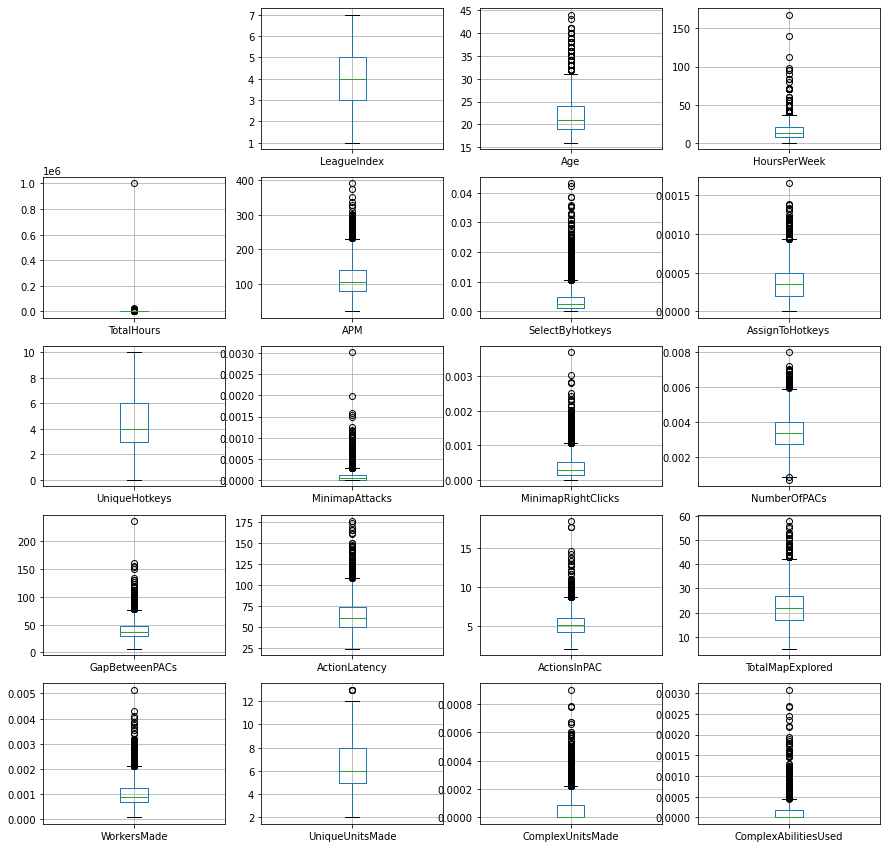

In [10]:
i=0
fig=plt.figure(figsize=(15, 15))
for x in df.columns :
    i=i+1
    if i !=1:
        ax=fig.add_subplot(5, 4, i)
        df.boxplot(column=x)

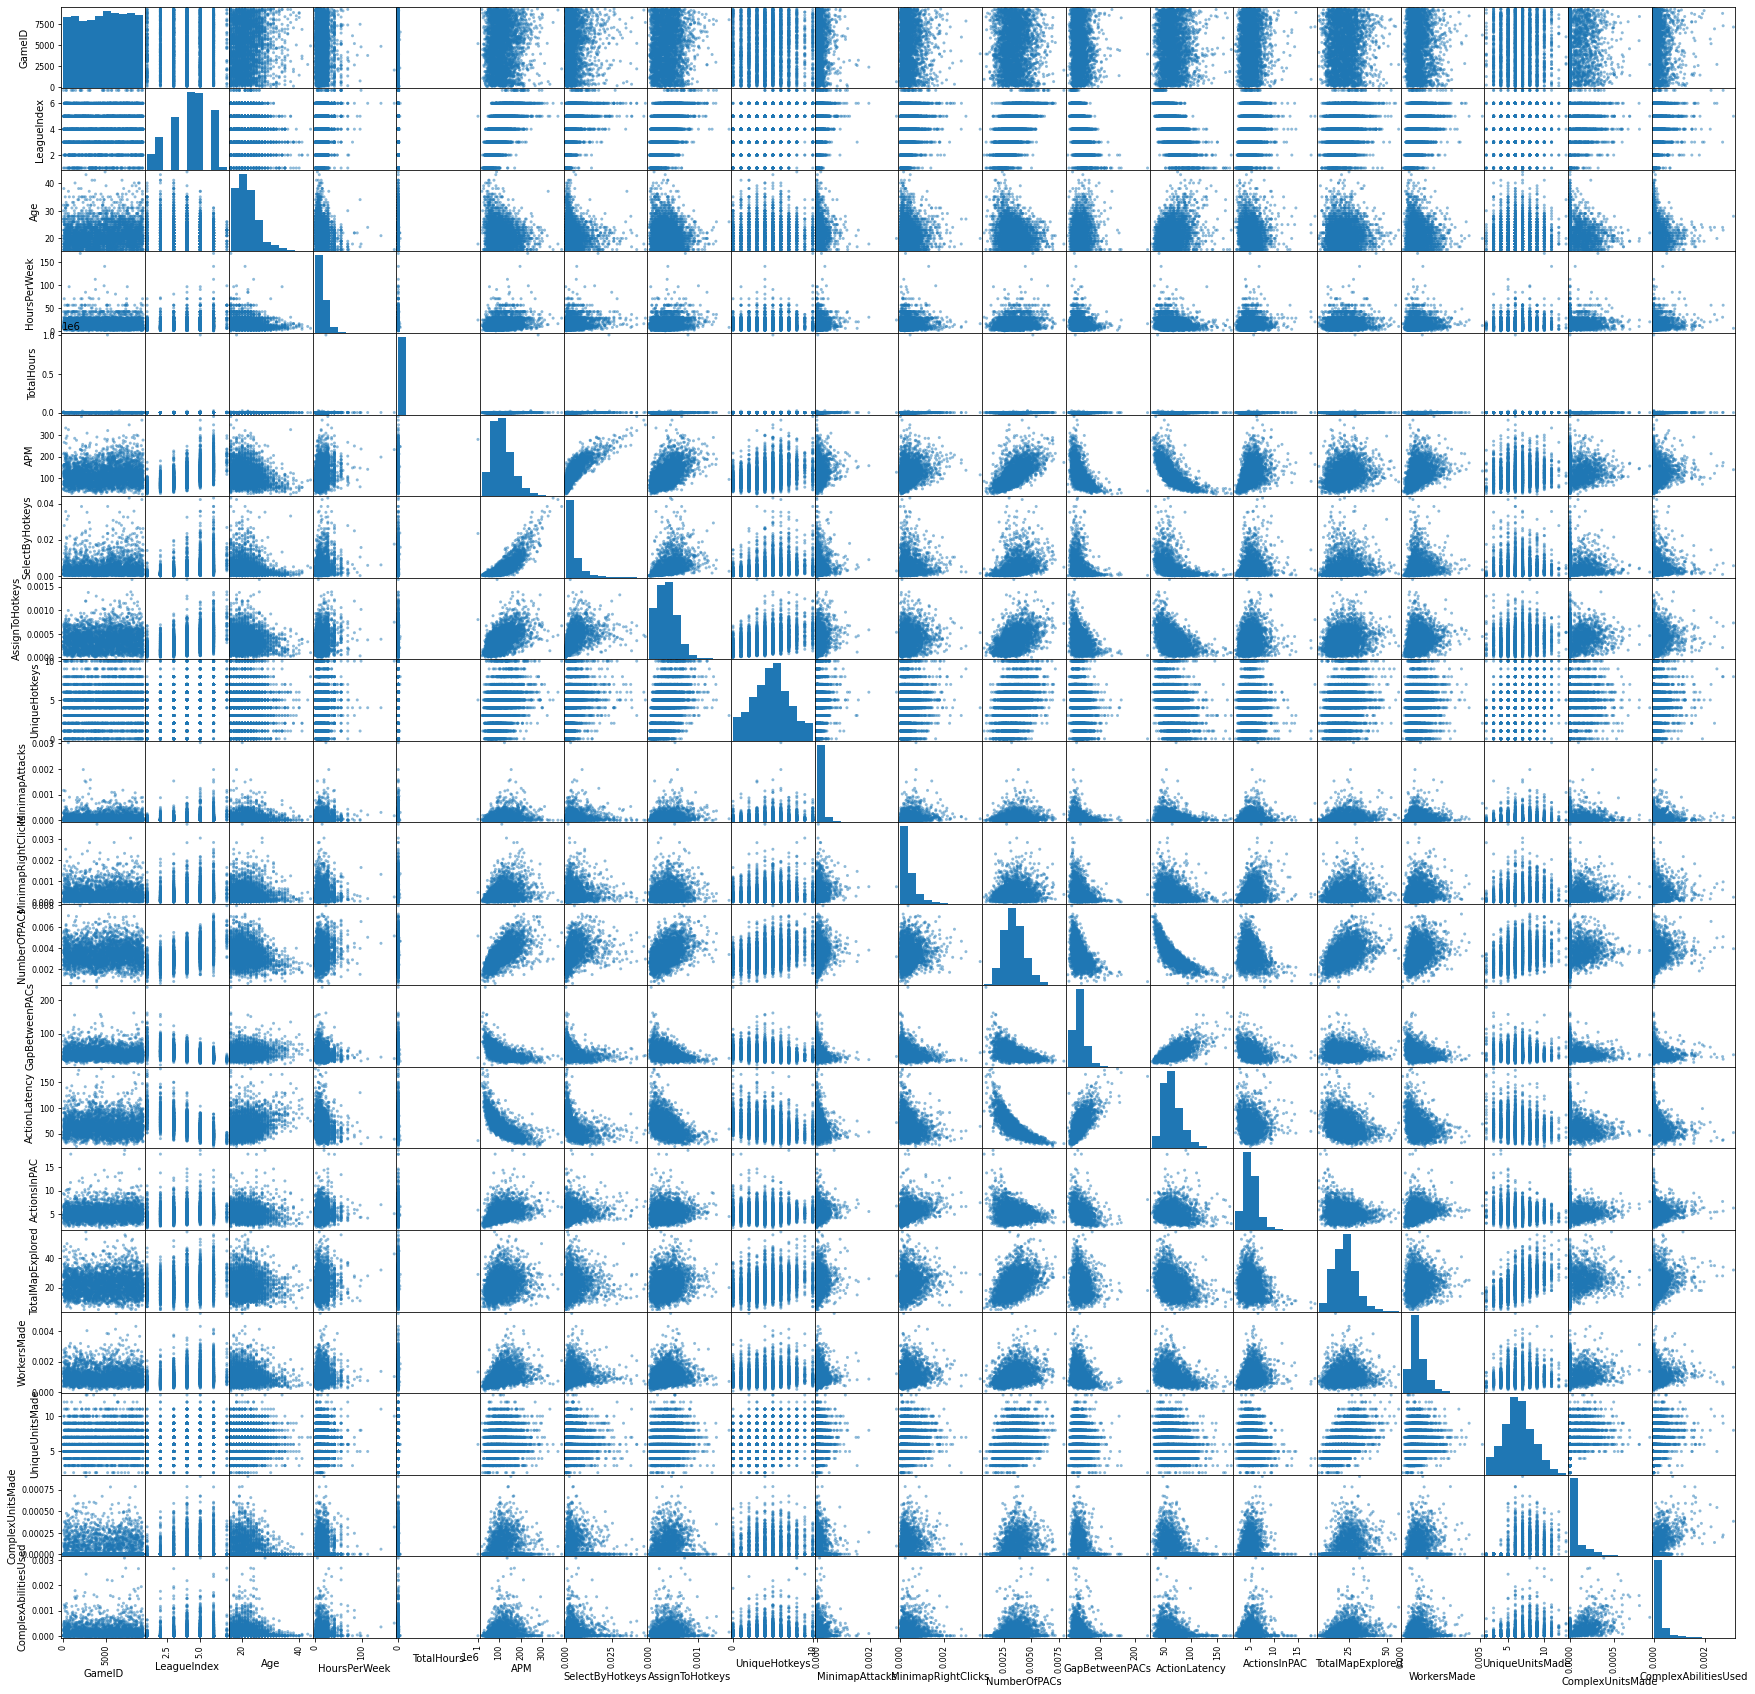

In [11]:
scatter_matrix(df, figsize = (30, 30))
plt.show()

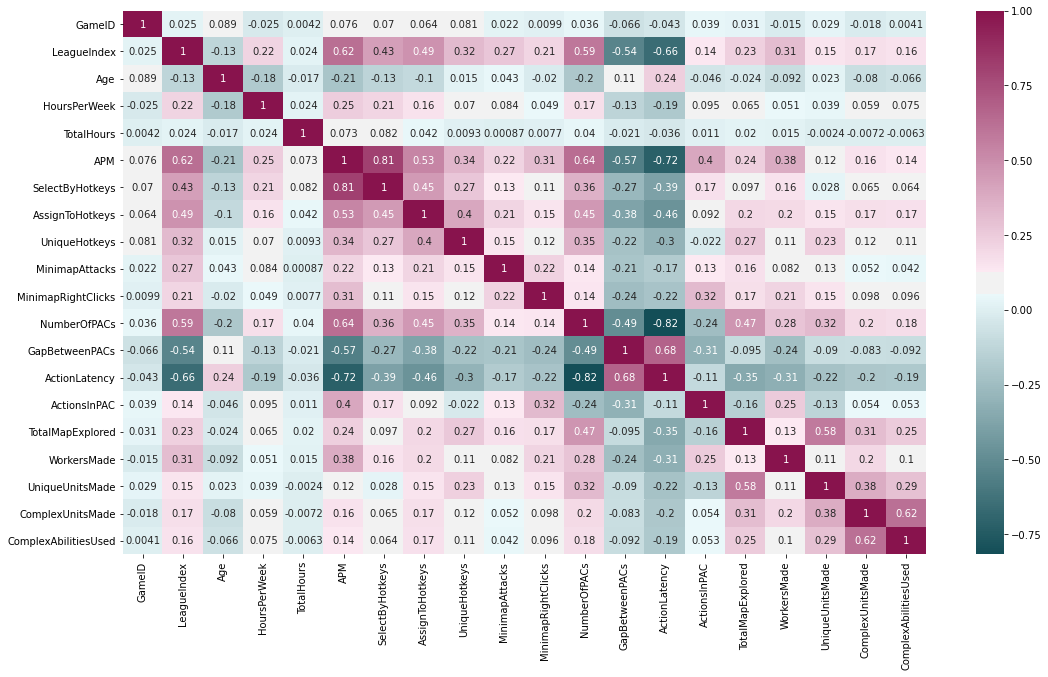

In [12]:
fig, ax = plt.subplots(figsize=(18,10)) 
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
sns.heatmap(df.corr(), cmap=cmap, annot=True, ax=ax)

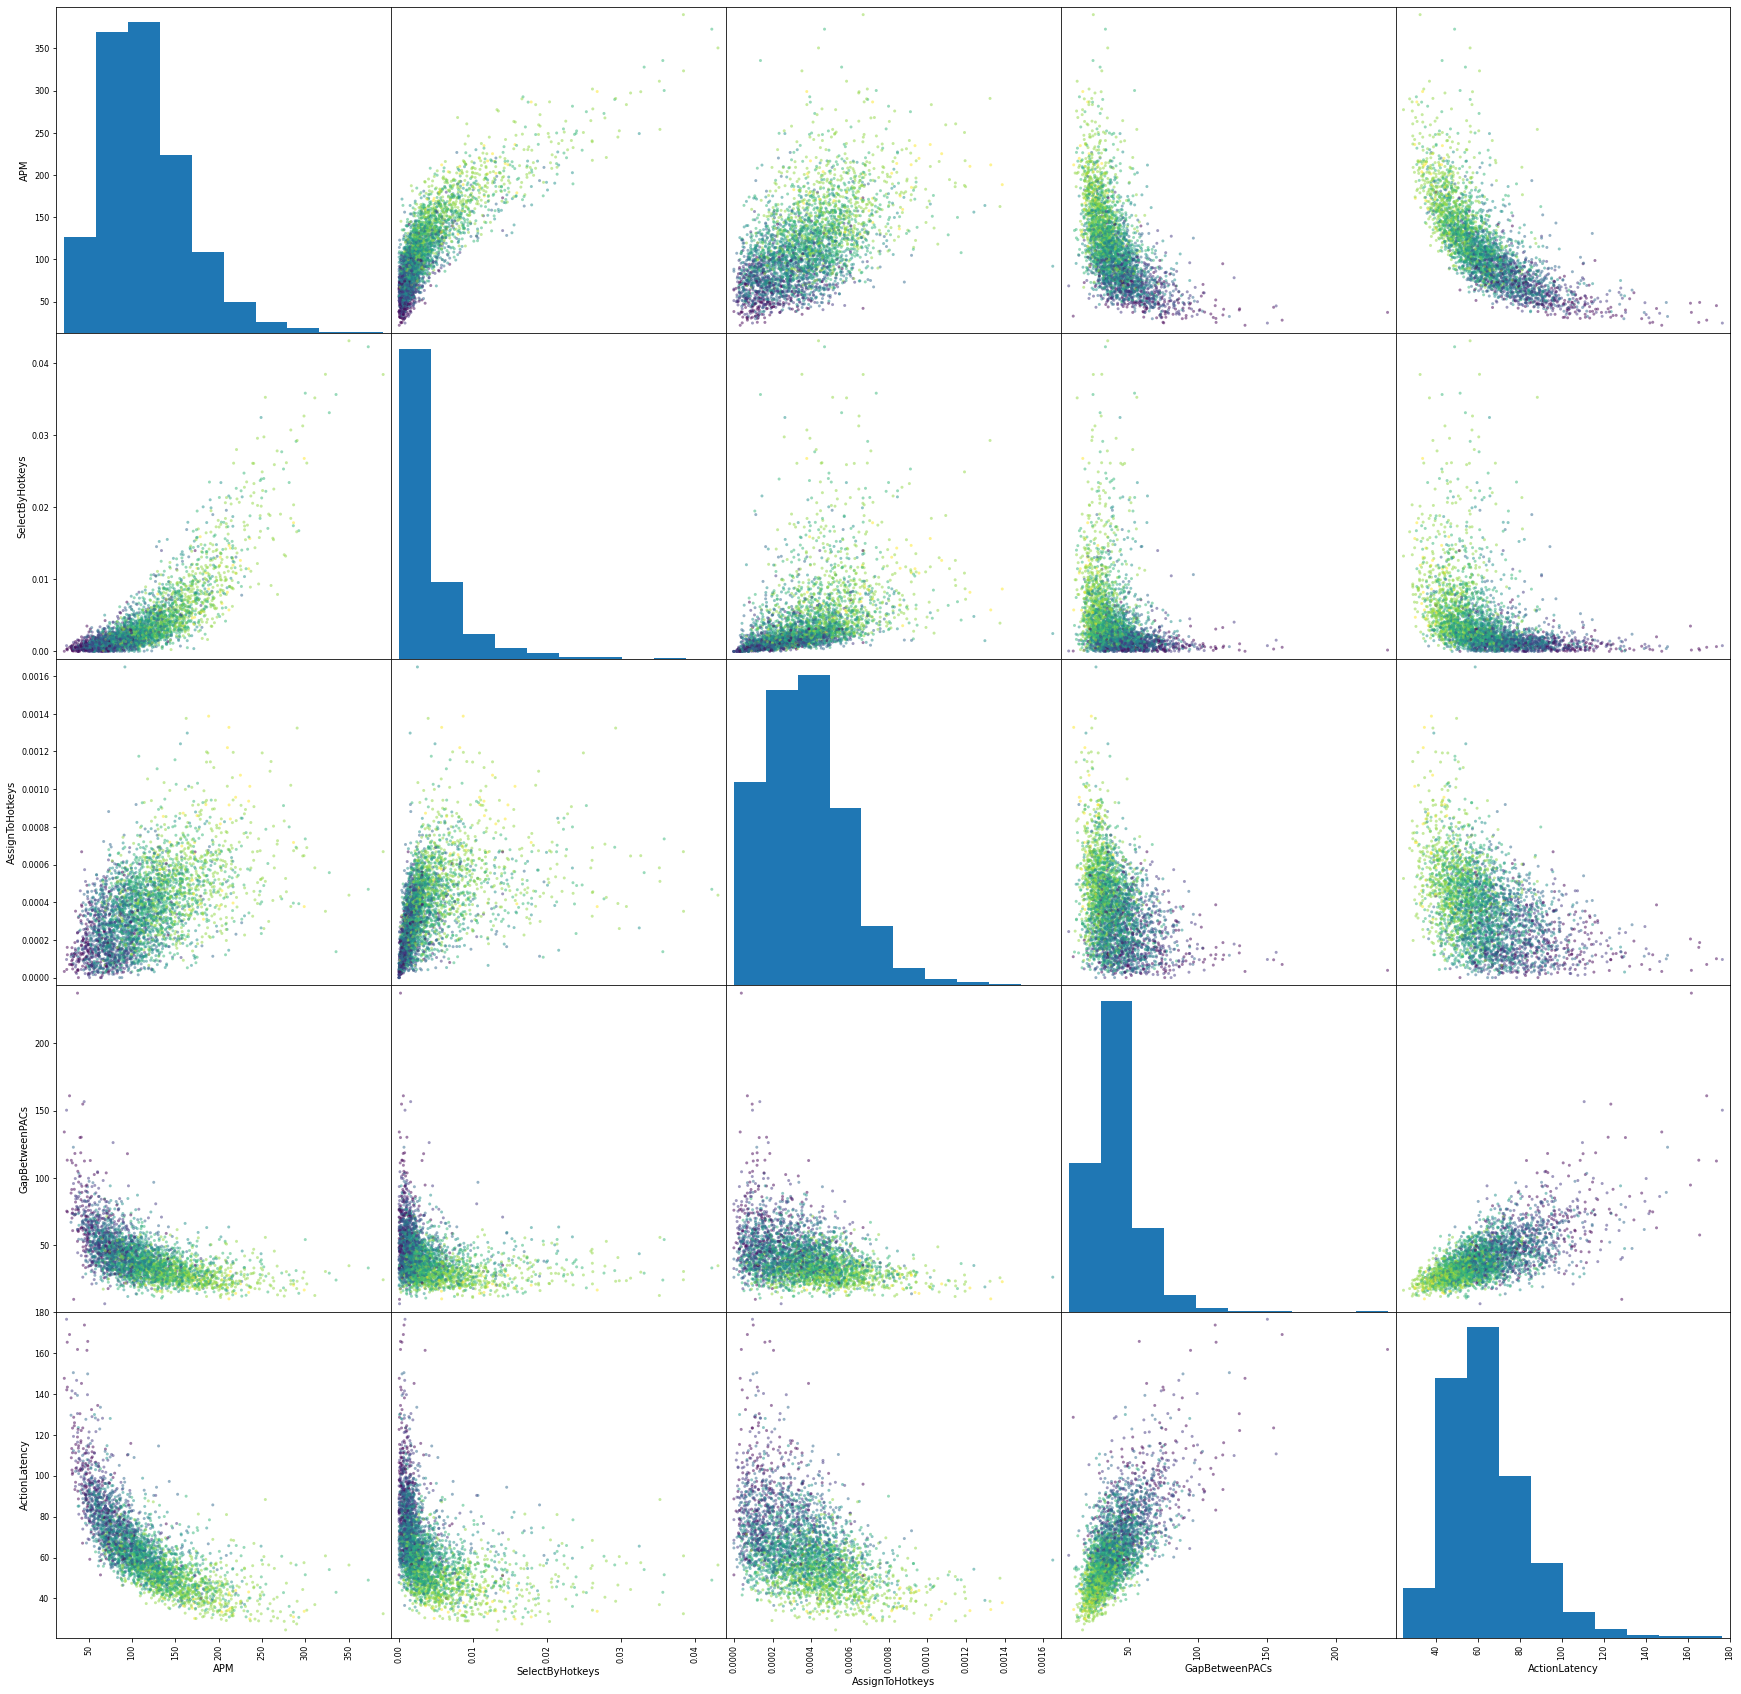

In [13]:
y=df.LeagueIndex
scatter_matrix(df.filter([ 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'NumberOFPACs', 'GapBetweenPACs', 'ActionLatency']), figsize = (30, 30), c=y)
plt.show()

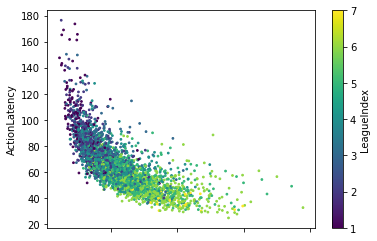

In [14]:
df.plot.scatter('APM', 'ActionLatency', 
            s=3, c='LeagueIndex', colormap='viridis')

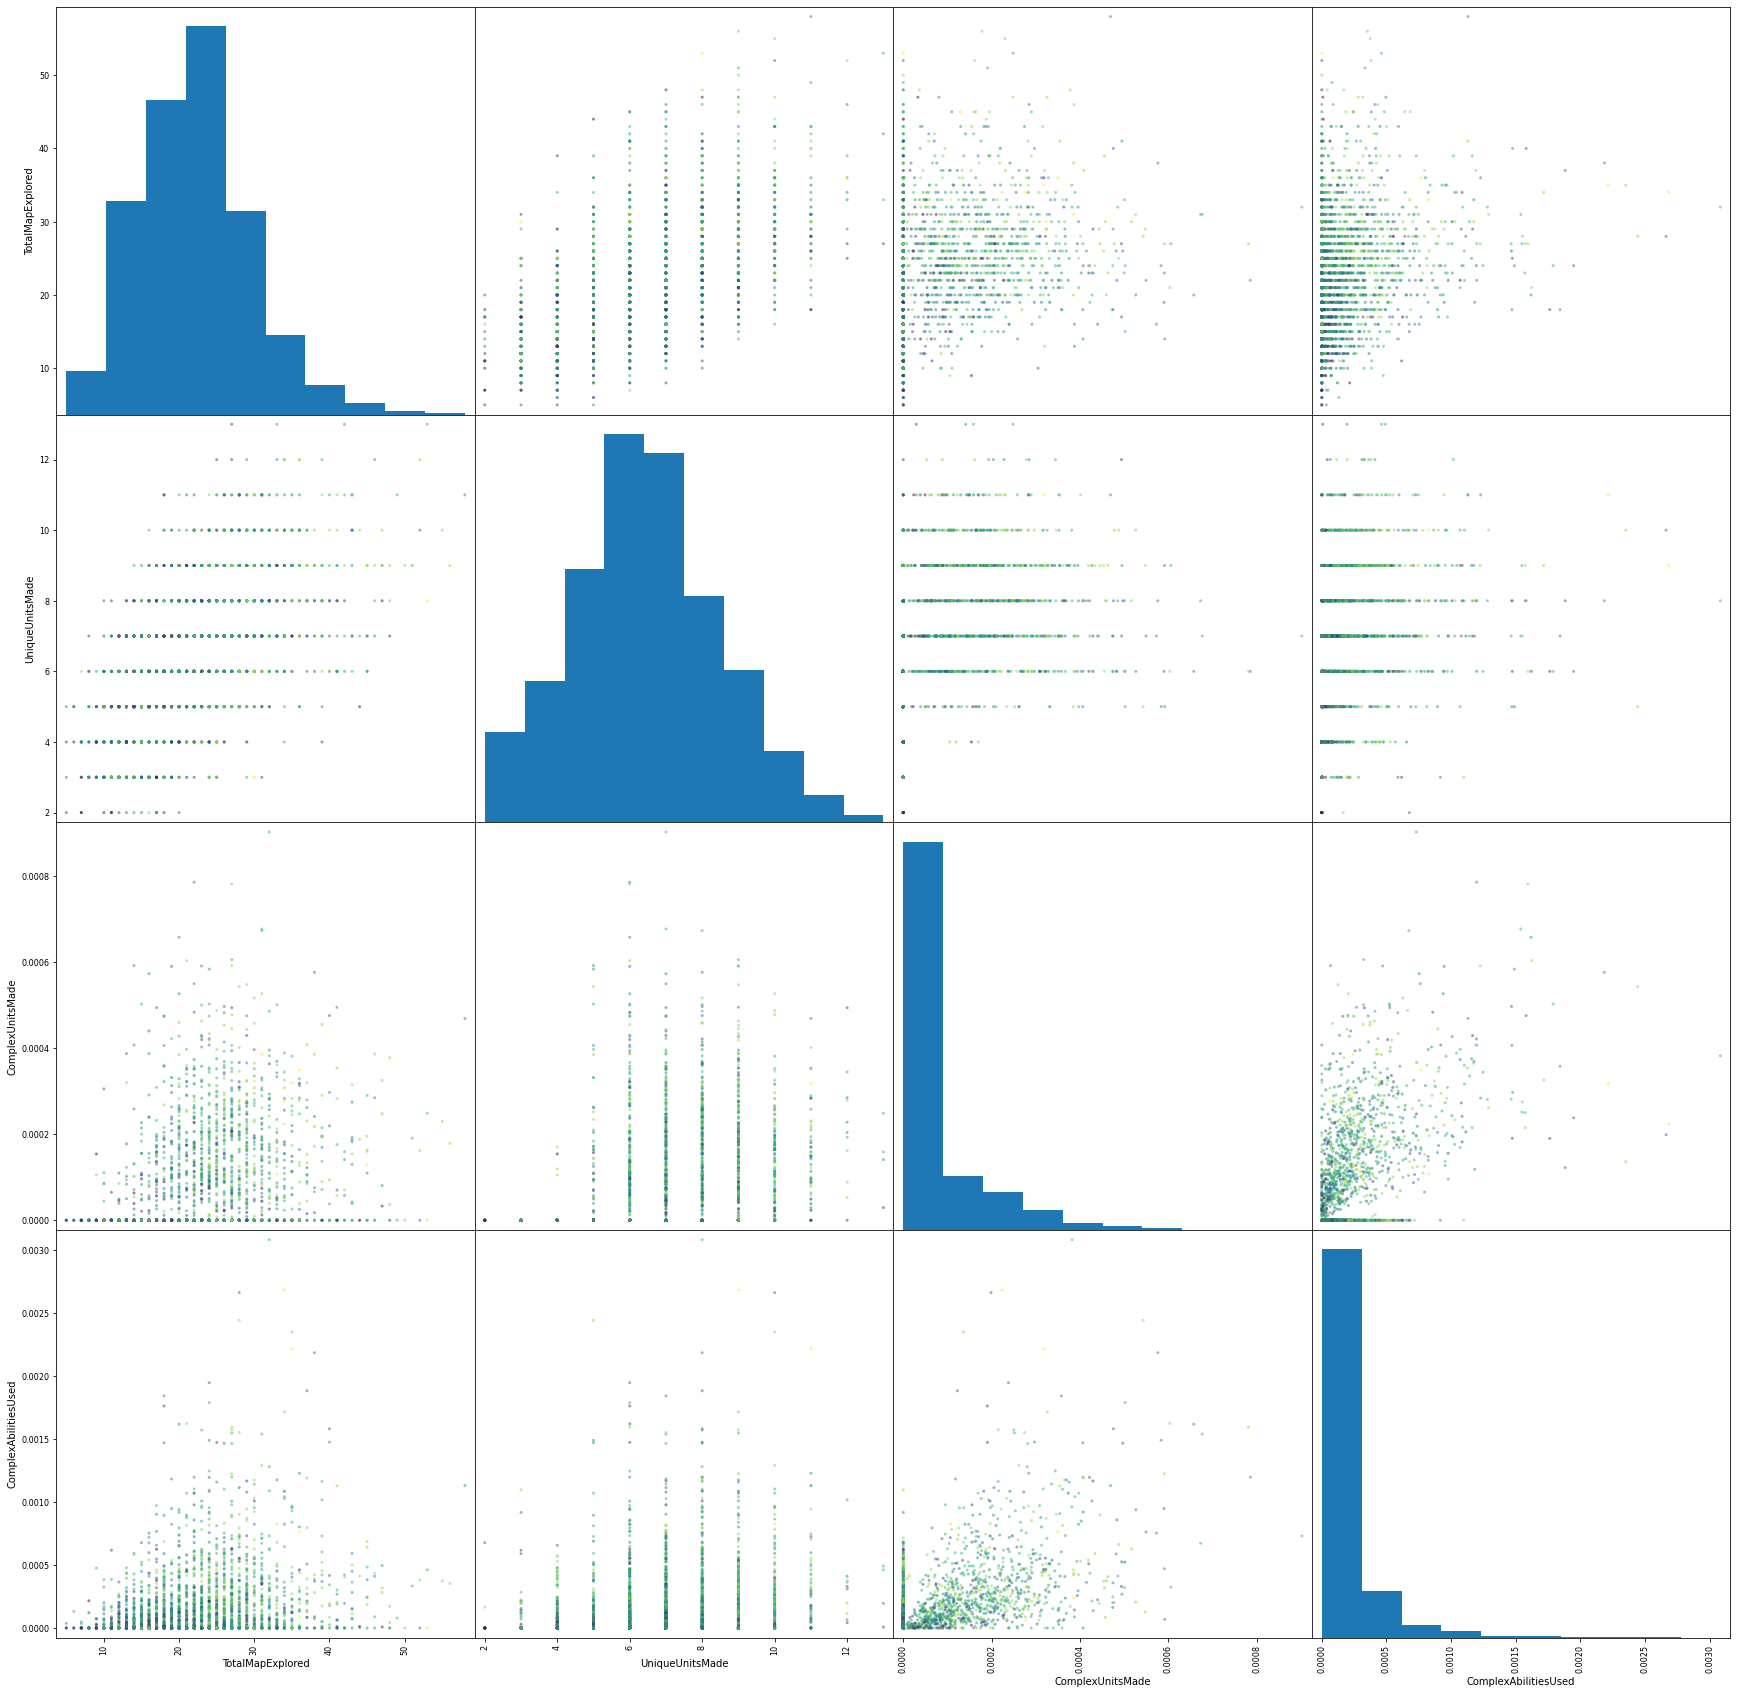

In [15]:
scatter_matrix(df.filter(['TotalMapExplored', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed' ]), figsize = (30, 30), c=y)
plt.show()

In [16]:
def plot_hbar(df, colx,coly,color, hover_data=[]):
    fig = px.bar(df.sort_values(coly).dropna(), 
                 x = colx, y=coly ,color=color,  
                 text=colx, orientation='h', width=600, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=colx, xaxis_title="", yaxis_title="",
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()


In [17]:
moyAPM = np.round(df.groupby('LeagueIndex')['APM'].mean().reset_index(level = 'LeagueIndex'), decimals=3)
#moyAPM

In [18]:
plot_hbar(moyAPM, 'APM', 'LeagueIndex', 'LeagueIndex')

In [19]:
moyAge = np.round(df.groupby('Age')['HoursPerWeek'].mean().reset_index(level = 'Age'), decimals=3)
#moyAge

In [20]:
plot_hbar(moyAge, 'HoursPerWeek', 'Age', 'Age')

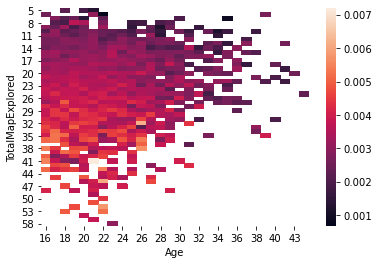

In [21]:
data=df.groupby(['TotalMapExplored', 'Age'])['NumberOfPACs'].mean().reset_index()
h=data.pivot(index='TotalMapExplored', columns='Age', values='NumberOfPACs')
sns.heatmap(h)
plt.show()

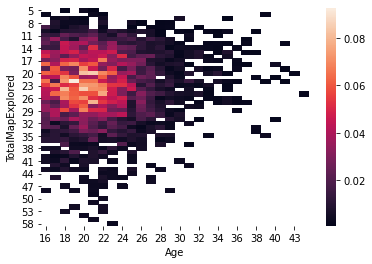

In [22]:
data=df.groupby(['TotalMapExplored', 'Age'])['NumberOfPACs'].sum().reset_index()
h=data.pivot(index='TotalMapExplored', columns='Age', values='NumberOfPACs')
sns.heatmap(h)
plt.show()

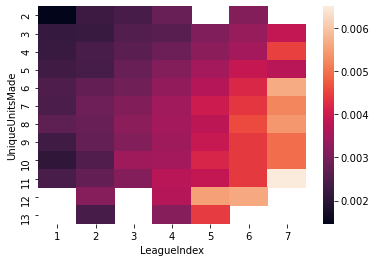

In [23]:
data=df.groupby(['UniqueUnitsMade', 'LeagueIndex'])['NumberOfPACs'].mean().reset_index()
h=data.pivot(index='UniqueUnitsMade', columns='LeagueIndex', values='NumberOfPACs')
sns.heatmap(h)
plt.show()

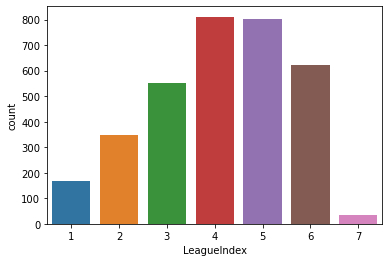

In [24]:
sns.countplot(data=df, x='LeagueIndex')

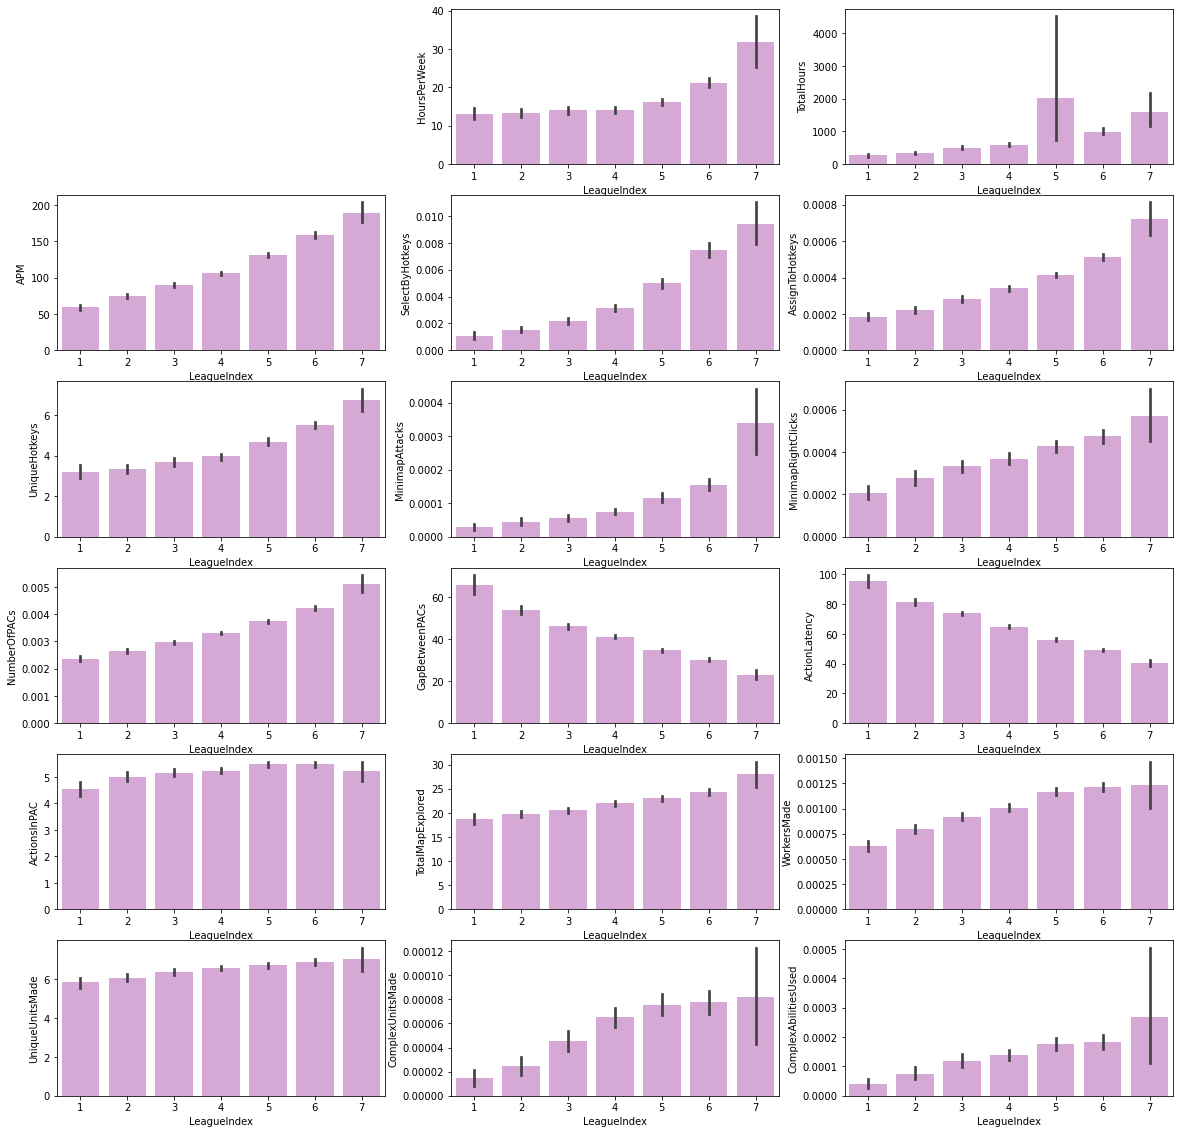

In [25]:
i=0
fig=plt.figure(figsize=(20, 20))
for x in df.columns :
    i=i+1
    if i !=1 and i !=2 and i !=3:
        ax=fig.add_subplot(6, 3, i-2)
        sns.barplot(data=df, x='LeagueIndex', y=x , color='plum')

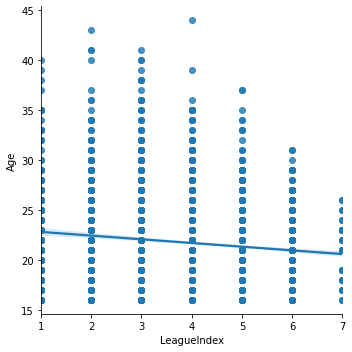

In [26]:
sns.lmplot(x='LeagueIndex', y='Age', data=df)

In [27]:
def hist_league_index(df, label: str):
    player_by_league_index = df.groupby(["LeagueIndex"])
    fig, axs = plt.subplots(1, 7, figsize=(18,3))
    plt.subplots_adjust(top=0.8)

    for i in range(7):
        league_index = i + 1
        data = player_by_league_index.get_group(league_index)[label]
        axs[i].hist(data, bins=10, weights=np.ones(len(data)) / len(data))
        axs[i].set_title(f"League Index = {league_index}")
        axs[i].yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
        axs[i].set_xlim((0,df[label].max()))
        axs[i].tick_params(axis='y', which='major', labelsize=8)

    fig.suptitle(f"Show the repartition of the {label} depending of the League Index of the player", fontsize=18)
    plt.show()

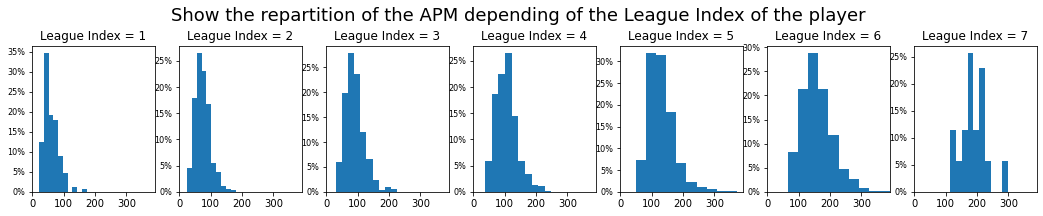

In [28]:
hist_league_index(df, "APM")

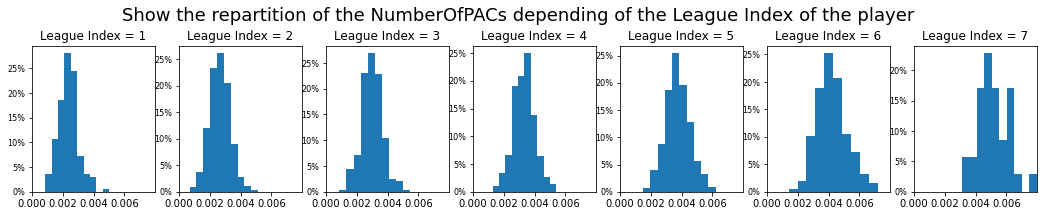

In [29]:
hist_league_index(df, "NumberOfPACs")

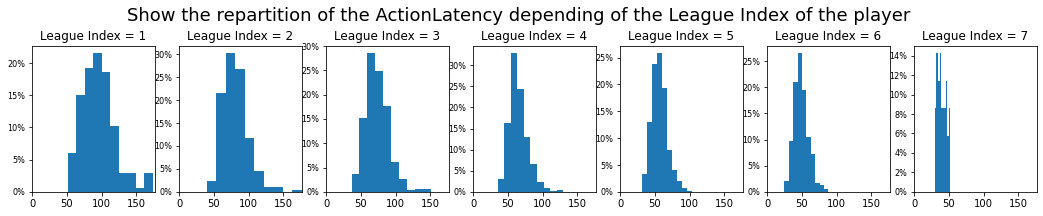

In [30]:
hist_league_index(df, "ActionLatency")

In [31]:
selection = ['APM', 'ActionLatency', "NumberOfPACs"]

In [32]:
features = df[selection]
target = df["LeagueIndex"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)

In [34]:
# Model bayes
bayes_model = GaussianNB()
bayes_model.fit(x_train, y_train)
pred=bayes_model.predict(x_test)
print(f"Percentage of accuracy : {round(10000*accuracy_score(y_test, pred))/100}%")

Percentage of accuracy : 36.23%


In [35]:
# SVC
svc = SVC()
svc.fit(x_train, y_train).score(x_test, y_test)
pred=svc.predict(x_test)
print(f"Percentage of accuracy : {round(10000*accuracy_score(y_test, pred))/100}%")

Percentage of accuracy : 36.23%


In [36]:
# Linear SVC
lsvc = make_pipeline(StandardScaler(), LinearSVC())
lsvc.fit(x_train, y_train)
pred=lsvc.predict(x_test)
print(f"Percentage of accuracy : {round(10000*accuracy_score(y_test, pred))/100}%")

Percentage of accuracy : 35.93%


In [37]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred=rfc.predict(x_test)
print(f"Percentage of accuracy : {round(10000*accuracy_score(y_test, pred))/100}%")

Percentage of accuracy : 34.28%


In [43]:
# Extra Trees Classifier
etc = ExtraTreesClassifier(n_estimators=10, max_depth=None,
                           min_samples_split=5, random_state=1)
scores = cross_val_score(etc, x_train, y_train, cv=20)
scores.max()

0.42105263157894735

In [44]:
def test_hyperparametres(hyperparametres):
    grid=GridSearchCV(ExtraTreesClassifier(), hyperparametres, n_jobs=-1)
    grid.fit(x_train, y_train)
    print(grid.best_score_, grid.best_estimator_)
    return grid.best_score_, grid.best_estimator_

In [45]:
hyperparametres = {
    "n_estimators": [i for i in range(45, 70)],
    'min_samples_split': [i for i in range(20, 30)],
    "random_state": [i for i in range(10, 20)]
}
x, y = test_hyperparametres(hyperparametres)

0.3865168539325842 ExtraTreesClassifier(min_samples_split=26, n_estimators=45, random_state=17)


In [57]:
# Extra Trees Classifier with the great search parameters
etc = ExtraTreesClassifier(n_estimators=45, max_depth=None,
                           min_samples_split=26, random_state=17)
scores = cross_val_score(etc, x_train, y_train, cv=28)
scores.max()

0.47368421052631576